<a href="https://colab.research.google.com/github/star114514-mit/dms/blob/main/honnmonoanygstest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 使い方
ランタイムからすべてのセルを実行をクリックしてしばらく待つと下の方に **末尾がgradio.appで終わっているURL** が出てくるのでクリックすると起動します。

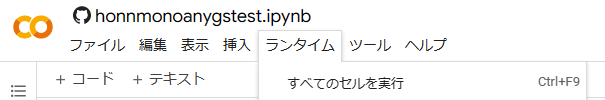
<br>
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<br>

### 末尾がgradio.appで終わっているURLの例

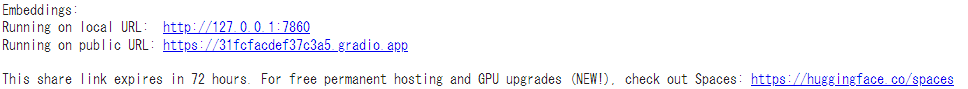

### GPUのチェック。
ここでエラーが出たらランタイム→ランタイムのタイプを変更からGPUに変更してみてください。

In [ ]:
!nvidia-smi

### 1111WebUIのダウンロード

In [ ]:
%cd /content
!git clone https://github.com/AUTOMATIC1111/stable-diffusion-webui.git

%cd stable-diffusion-webui
!git pull
!wget https://raw.githubusercontent.com/star114514-mit/dms/main/config.json
%cd /content/stable-diffusion-webui/localizations
!wget https://raw.githubusercontent.com/Katsuyuki-Karasawa/stable-diffusion-webui-localization-ja_JP/main/localizations/ja_JP.json

### NAIのリークモデルとAnything v3.0のダウンロード。

In [ ]:
!mkdir -p /content/stable-diffusion-webui/models/Stable-diffusion /content/stable-diffusion-webui/models/hypernetworks
%cd /content/stable-diffusion-webui/models/Stable-diffusion/
!apt install -y -qq aria2

# animesfw-final-pruned + 4G animefull-final-pruned
!aria2c --summary-interval=10 -x 3 --allow-overwrite=true -Z \
  https://pub-2fdef7a2969f43289c42ac5ae3412fd4.r2.dev/animefull-final-pruned.ckpt \
  https://huggingface.co/Linaqruf/anything-v3.0/resolve/main/Anything-V3.0-pruned.ckpt
!curl -Lo /content/stable-diffusion-webui/config.yaml https://pub-2fdef7a2969f43289c42ac5ae3412fd4.r2.dev/config-pruned.yaml
# disabled models
# !aria2c --summary-interval=10 -x 3 --allow-overwrite=true -Z \
#   https://pub-2fdef7a2969f43289c42ac5ae3412fd4.r2.dev/animefull-latest.ckpt \
#   https://pub-2fdef7a2969f43289c42ac5ae3412fd4.r2.dev/animesfw-latest.ckpt 
# !curl -Lo /content/stable-diffusion-webui/config.yaml https://pub-2fdef7a2969f43289c42ac5ae3412fd4.r2.dev/config-latest.yaml

# Install VAE Weights (optional)
!curl -Lo /content/animevae.pt https://pub-2fdef7a2969f43289c42ac5ae3412fd4.r2.dev/animevae.pt
 
# Install hypernetwork （optional)
!curl -L https://cloudflare-ipfs.com/ipfs/bafybeiduanx2b3mcvxlwr66igcwnpfmk3nc3qgxlpwh6oq6m6pxii3f77e/_modules.tar | tar x -C /content/stable-diffusion-webui/models/hypernetworks

# Install embeddings (optional)
# !curl -L https://cloudflare-ipfs.com/ipfs/bafybeie3hdjchxs5tz4n75bos53nhcklslguxchdurc2ynrzcfv2kwyklu/embeddings.tar | tar x -C /content/stable-diffusion-webui/embeddings

# WebUIの起動。
末尾が**gradio.appで終わっているURLが出てきたらクリックする**と起動します。
## ***末尾がgradio.appで終わっているURLの例***

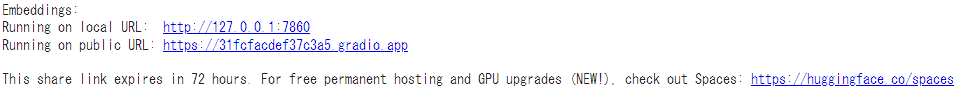

Commandline arguments are:
  - `--share` - create online gradio.app link
  - `--gradio-debug` - print outputs to console
  - `--gradio-auth me:qwerty` - add authentication to gradio: username me, password qwerty

In [ ]:
%cd /content/stable-diffusion-webui

# hacks to load model in colab
!sed -i 's/map_location="cpu"/map_location="cuda"/g' /content/stable-diffusion-webui/modules/sd_models.py

# Use novelai stable-diffusion-private (maybe slow, optional)
# !mkdir -p repositories/stable-diffusion
# !curl -L https://cloudflare-ipfs.com/ipfs/bafybeiauciguui6skzcwg23mjprjbuqhfzudms2gfi4rna55bygc3s6yxa/stable-diffusion-private.tar | tar x -C repositories/stable-diffusion
# !git config --global --add safe.directory /content/stable-diffusion-webui/repositories/stable-diffusion
# !pip3 install -U --pre triton icecream xformers
# !sed -i 's/transformer\.text_model/transformer/g' modules/sd_hijack.py
# !sed -i 's/self.model.device/"cuda"/g' /content/stable-diffusion-webui/repositories/stable-diffusion/ldm/models/diffusion/*.py
# !COMMANDLINE_ARGS="--share --gradio-debug --config config.yaml --xformers --vae-path /content/animevae.pt" \
#  REQS_FILE="requirements.txt" STABLE_DIFFUSION_COMMIT_HASH="5d95f1742ab1831d99df91c1a469b2b56a61eebf" python launch.py

# ...Or use normal stable-diffusion
!pip install -U -qq pip
!pip install -qq -r requirements.txt
!pip install -qq pytorch_lightning==1.7.7
!echo "" > /tmp/requirements_empty.txt
!COMMANDLINE_ARGS="--share --gradio-debug --config config.yaml --vae-path /content/animevae.pt" REQS_FILE="/tmp/requirements_empty.txt" python launch.py